In [2]:
from sklearn.preprocessing import StandardScaler
import pandas as pd
import numpy as np

In [3]:
from pathlib import Path

# Configurable parts
SYMBOL = "USDJPY"
SAMPLE_TYPE = "time"
MINUTES = 5

START_DATE = "20210101"
END_DATE = "20241231"

# Build base name
RESAMPLED_NAME = f"{SYMBOL}-{MINUTES}m-{START_DATE}-{END_DATE}"

# Base directories
BASE_DIR = Path("../data")
RESAMPLED_DIR = BASE_DIR / "resampled"
PROCESSED_DIR = BASE_DIR / "processed"
EVENTS_DIR = BASE_DIR / "interm/events"

# Final paths
RESAMPLED_FILE_PATH = RESAMPLED_DIR / f"{RESAMPLED_NAME}.pkl"
PROCESSED_FILE_PATH = PROCESSED_DIR / f"{RESAMPLED_NAME}_FEATURES.pkl"

In [4]:
%%time
df = pd.read_pickle(PROCESSED_FILE_PATH)

CPU times: user 1.68 ms, sys: 27 ms, total: 28.7 ms
Wall time: 26.2 ms


In [6]:
df.columns

Index(['open', 'high', 'low', 'close', 'volume', 'spread', 'close_pct_return',
       'close_return', 'close_log_return', 'close_fd_return',
       'close_log_fd_return', 'EMA_5', 'EMA_9', 'EMA_20', 'EMA_24', 'EMA_36',
       'EMA_50', 'EMA_100', 'ATRr_14', 'ATRr_60', 'ATRr_120', 'ADX_14',
       'ADXR_14_2', 'DMP_14', 'DMN_14', 'RSI_14', 'RSI_25', 'RSI_50',
       'BBL_5_2.0_2.0', 'BBM_5_2.0_2.0', 'BBU_5_2.0_2.0', 'BBB_5_2.0_2.0',
       'BBP_5_2.0_2.0', 'BBL_10_2.0_2.0', 'BBM_10_2.0_2.0', 'BBU_10_2.0_2.0',
       'BBB_10_2.0_2.0', 'BBP_10_2.0_2.0', 'BBL_15_2.0_2.0', 'BBM_15_2.0_2.0',
       'BBU_15_2.0_2.0', 'BBB_15_2.0_2.0', 'BBP_15_2.0_2.0', 'BBL_20_2.0_2.0',
       'BBM_20_2.0_2.0', 'BBU_20_2.0_2.0', 'BBB_20_2.0_2.0', 'BBP_20_2.0_2.0',
       'MACD_8_17_9', 'MACDh_8_17_9', 'MACDs_8_17_9', 'MACD_12_26_9',
       'MACDh_12_26_9', 'MACDs_12_26_9', 'unix_time', 'hour', 'dow', 'dom',
       'month', 'hour_sin', 'hour_cos', 'dow_sin', 'dow_cos', 'dom_sin',
       'dom_cos', 'month_sin',

In [9]:
columns = df.columns.to_list()

In [7]:
df.describe()

,open,high,low,close,volume,spread,close_pct_return,close_return,close_log_return,close_fd_return,close_log_fd_return,EMA_5,EMA_9,EMA_20,EMA_24,EMA_36,EMA_50,EMA_100,ATRr_14,ATRr_60,ATRr_120,ADX_14,ADXR_14_2,DMP_14,DMN_14,RSI_14,RSI_25,RSI_50,BBL_5_2.0_2.0,BBM_5_2.0_2.0,BBU_5_2.0_2.0,BBB_5_2.0_2.0,BBP_5_2.0_2.0,BBL_10_2.0_2.0,BBM_10_2.0_2.0,BBU_10_2.0_2.0,BBB_10_2.0_2.0,BBP_10_2.0_2.0,BBL_15_2.0_2.0,BBM_15_2.0_2.0,BBU_15_2.0_2.0,BBB_15_2.0_2.0,BBP_15_2.0_2.0,BBL_20_2.0_2.0,BBM_20_2.0_2.0,BBU_20_2.0_2.0,BBB_20_2.0_2.0,BBP_20_2.0_2.0,MACD_8_17_9,MACDh_8_17_9,MACDs_8_17_9,MACD_12_26_9,MACDh_12_26_9,MACDs_12_26_9,unix_time,hour,dow,dom,month,hour_sin,hour_cos,dow_sin,dow_cos,dom_sin,dom_cos,month_sin,month_cos
count,298164.000000,298164.000000,298164.000000,298164.000000,2.981640e+05,298164.000000,298164.000000,298164.000000,298164.000000,298164.000000,298164.000000,298164.000000,298164.000000,298164.000000,298164.000000,298164.000000,298164.000000,298164.000000,298164.000000,298164.000000,298164.000000,298164.000000,298164.000000,298164.000000,298164.000000,298164.000000,298164.000000,298164.000000,298164.000000,298164.000000,298164.000000,298164.000000,2.981640e+05,298164.000000,298164.000000,298164.000000,298164.000000,298164.000000,298164.000000,298164.000000,298164.000000,298164.000000,298164.000000,298164.000000,298164.000000,298164.000000,298164.000000,298164.000000,298164.000000,2.981640e+05,298164.000000,298164.000000,2.981640e+05,298164.000000,2.981640e+05,298164.000000,298164.000000,298164.000000,298164.000000,2.981640e+05,2.981640e+05,298164.000000,298164.000000,2.981640e+05,298164.000000,2.981640e+05,2.981640e+05
mean,133.414339,133.441302,133.386866,133.414514,2.302660e+12,0.007571,0.000001,0.000181,0.000001,2.473690,0.090490,133.414153,133.413792,133.412799,133.412438,133.411355,133.410090,133.405557,0.054624,0.054622,0.054618,24.893647,24.893673,0.166643,0.173173,50.939151,50.873207,50.798054,133.355485,133.414153,133.472820,0.086448,5.087231e-01,133.327203,133.413701,133.500199,0.127401,0.511735,133.305981,133.413250,133.520519,0.157960,0.513711,133.287999,133.412799,133.537599,0.183749,0.515658,0.000812,2.174770e-07,0.000812,0.001263,4.649217e-09,0.001263,1.672693e+09,11.494912,2.047128,15.742377,6.537707,4.878935e-04,1.300982e-04,0.343076,-0.048525,-1.588689e-04,-0.023801,-6.618636e-03,-9.700893e-03
std,16.706479,16.712616,16.699949,16.706449,2.276510e+12,0.011423,0.000355,0.049475,0.000356,0.318983,0.002451,16.706433,16.706430,16.706426,16.706425,16.706424,16.706422,16.706391,0.037576,0.030815,0.028404,10.251415,10.198575,0.131229,0.160849,11.660741,8.926946,6.602626,16.692902,16.706463,16.720273,0.092876,2.866371e-01,16.686280,16.706490,16.727193,0.130706,0.312136,16.681349,16.706518,16.732422,0.159641,0.323778,16.677195,16.706546,16.736870,0.183736,0.331029,0.044860,1.725855e-02,0.040499,0.056438,1.680807e-02,0.053218,3.622822e+07,6.922382,1.503824,8.767821,3.425714,7.071604e-01,7.070554e-01,0.528024,0.775331,7.135332e-01,0.700219,7.082405e-01,7.058759e-01
min,103.108000,103.121500,103.095000,103.108500,0.000000e+00,0.001167,-0.021205,-3.172500,-0.021433,-0.204617,0.072633,103.122139,103.125506,103.132762,103.133145,103.129874,103.120390,103.099575,0.005018,0.009619,0.012102,5.104442,5.325292,0.008206,0.009475,3.519969,7.407503,11.237798,103.098238,103.117600,103.128303,0.000031,3.549198e-08,103.104567,103.125450,103.144573,0.001707,-0.248660,103.099656,103.127200,103.145269,0.005930,-0.431656,103.091147,103.129850,103.149008,0.006906,-0.582429,-0.999642,-5.062325e-01,-0.824335,-1.133353,-4.421376e-01,-0.985931,1.609990e+09,0.000000,0.000000,1.000000,1.000000,-1.000000e+00,-1.000000e+00,-0.781831,-0.900969,-9.987165e-01,-0.994869,-1.000000e+00,-1.000000e+00
25%,114.640000,114.658500,114.621500,114.639500,6.539950e+11,0.004103,-0.000129,-0.017000,-0.000129,2.129291,0.087869,114.640723,114.640257,114.638378,114.639193,114.638262,114.636193,114.641416,0.029506,0.031998,0.032511,17.241934,17.284254,0.082319,0.079

In [10]:
scaler = StandardScaler()

In [12]:
df[columns] = scaler.fit_transform(df[columns])

In [13]:
df.describe()

,open,high,low,close,volume,spread,close_pct_return,close_return,close_log_return,close_fd_return,close_log_fd_return,EMA_5,EMA_9,EMA_20,EMA_24,EMA_36,EMA_50,EMA_100,ATRr_14,ATRr_60,ATRr_120,ADX_14,ADXR_14_2,DMP_14,DMN_14,RSI_14,RSI_25,RSI_50,BBL_5_2.0_2.0,BBM_5_2.0_2.0,BBU_5_2.0_2.0,BBB_5_2.0_2.0,BBP_5_2.0_2.0,BBL_10_2.0_2.0,BBM_10_2.0_2.0,BBU_10_2.0_2.0,BBB_10_2.0_2.0,BBP_10_2.0_2.0,BBL_15_2.0_2.0,BBM_15_2.0_2.0,BBU_15_2.0_2.0,BBB_15_2.0_2.0,BBP_15_2.0_2.0,BBL_20_2.0_2.0,BBM_20_2.0_2.0,BBU_20_2.0_2.0,BBB_20_2.0_2.0,BBP_20_2.0_2.0,MACD_8_17_9,MACDh_8_17_9,MACDs_8_17_9,MACD_12_26_9,MACDh_12_26_9,MACDs_12_26_9,unix_time,hour,dow,dom,month,hour_sin,hour_cos,dow_sin,dow_cos,dom_sin,dom_cos,month_sin,month_cos
count,2.981640e+05,2.981640e+05,2.981640e+05,2.981640e+05,2.981640e+05,2.981640e+05,2.981640e+05,2.981640e+05,2.981640e+05,2.981640e+05,2.981640e+05,2.981640e+05,2.981640e+05,2.981640e+05,2.981640e+05,2.981640e+05,2.981640e+05,2.981640e+05,2.981640e+05,2.981640e+05,2.981640e+05,2.981640e+05,2.981640e+05,2.981640e+05,2.981640e+05,2.981640e+05,2.981640e+05,2.981640e+05,2.981640e+05,2.981640e+05,2.981640e+05,2.981640e+05,2.981640e+05,2.981640e+05,2.981640e+05,2.981640e+05,2.981640e+05,2.981640e+05,2.981640e+05,2.981640e+05,2.981640e+05,2.981640e+05,2.981640e+05,2.981640e+05,2.981640e+05,2.981640e+05,2.981640e+05,2.981640e+05,2.981640e+05,2.981640e+05,2.981640e+05,2.981640e+05,2.981640e+05,2.981640e+05,2.981640e+05,2.981640e+05,2.981640e+05,2.981640e+05,2.981640e+05,2.981640e+05,2.981640e+05,2.981640e+05,2.981640e+05,2.981640e+05,2.981640e+05,2.981640e+05,2.981640e+05
mean,3.050317e-17,3.660380e-17,1.281133e-16,4.880507e-17,-3.050317e-18,-3.050317e-18,-5.242732e-19,-4.575475e-18,3.145639e-18,1.220127e-17,-1.677674e-16,-1.342139e-16,-5.490571e-17,-3.050317e-18,7.015729e-17,-6.100634e-17,-1.708177e-16,1.281133e-16,-7.263567e-17,3.202833e-17,-4.308573e-17,6.100634e-18,-3.126575e-17,-5.719344e-18,4.823314e-17,2.526044e-17,1.715803e-18,-5.719344e-18,-5.490571e-17,-4.270444e-17,1.006605e-16,-3.279091e-17,1.870702e-17,-7.930824e-17,1.464152e-16,1.342139e-16,2.897801e-17,-3.050317e-17,-1.159120e-16,7.930824e-17,-2.653776e-16,-5.052087e-18,2.669027e-17,1.708177e-16,9.150951e-17,-7.320761e-17,-1.143869e-18,-9.055628e-19,-6.863213e-18,8.197727e-18,-7.816437e-18,6.100634e-18,-6.773848e-18,2.859672e-18,-1.250630e-16,-1.048546e-17,3.212365e-17,-3.812896e-17,-5.185539e-17,-2.149520e-17,1.715803e-18,1.696739e-16,-4.308573e-17,-3.050317e-17,1.715803e-17,-8.352626e-18,-2.440254e-17
std,1.000002e+00,1.000002e+00,1.000002e+00,1.000002e+00,1.000002e+00,1.000002e+00,1.000002e+00,1.000002e+00,1.000002e+00,1.000002e+00,1.000002e+00,1.000002e+00,1.000002e+00,1.000002e+00,1.000002e+00,1.000002e+00,1.000002e+00,1.000002e+00,1.000002e+00,1.000002e+00,1.000002e+00,1.000002e+00,1.000002e+00,1.000002e+00,1.000002e+00,1.000002e+00,1.000002e+00,1.000002e+00,1.000002e+00,1.000002e+00,1.000002e+00,1.000002e+00,1.000002e+00,1.000002e+00,1.000002e+00,1.000002e+00,1.000002e+00,1.000002e+00,1.000002e+00,1.000002e+00,1.000002e+00,1.000002e+00,1.000002e+00,1.000002e+00,1.000002e+00,1.000002e+00,1.000002e+00,1.000002e+00,1.000002e+00,1.000002e+00,1.000002e+00,1.000002e+00,1.000002e+00,1.000002e+00,1.000002e+00,1.000002e+00,1.000002e+00,1.000002e+00,1.000002e+00,1.000002e+00,1.000002e+00,1.000002e+00,1.000002e+00,1.000002e+00,1.000002e+00,1.000002e+00,1.000002e+00
min,-1.814050e+00,-1.814190e+00,-1.813893e+00,-1.814034e+00,-1.011489e+00,-5.606281e-01,-5.966196e+01,-6.412755e+01,-6.028088e+01,-8.396420e+00,-7.286674e+00,-1.813198e+00,-1.812975e+00,-1.812482e+00,-1.812437e+00,-1.812568e+00,-1.813060e+00,-1.814038e+00,-1.320148e+00,-1.460461e+00,-1.496818e+00,-1.930391e+00,-1.918740e+00,-1.207335e+00,-1.017719e+00,-4.066574e+00,-4.869054e+00,-5.991604e+00,-1.812585e+00,-1.813466e+00,-1.814837e+00,-9.304491e-01,-1.774802e+00,-1.811230e+00,-1.812966e+00,-1.814750e+00,-9.616519e-01,-2.436106e+00,-1.810787e+00,-1.812831e+00,-1.815356e+00,-9.523276e-01,-2.919800e+00,-1.810670e+0

<Axes: xlabel='timestamp'>

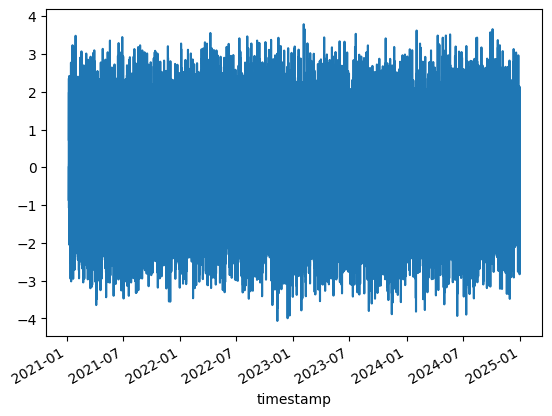

In [21]:
df['RSI_14'].plot()

In [14]:
NORMALIZED_FILE_PATH = PROCESSED_DIR / f"{RESAMPLED_NAME}_NORM.pkl"

In [15]:
df.to_pickle(NORMALIZED_FILE_PATH)